In [95]:
# Import the requred libraries
import yfinance as yf
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
# Functions

def add_currency(coins, currency):
    '''
    Transforms crypto currencies tickers to yahoo finance tickers.
    Takes in list of crypto currency and append to their name fiat currency(USD,EUR,etc).
    
    BTC --------> BTC-USD
    
    >>> add_currency('BTC')
    'BTC-USD'
    '''
    
    # Placeholder for the results
    coin_curr_pairs = []
    
    # Appends currency to the coins tickers
    for coin_name in coins:
        new_name = f'{coin_name}-{currency}'
        coin_curr_pairs.append(new_name)
    
    # Returns the results in form of a list
    return coin_curr_pairs

def get_port_data(tickers, period = '3y'):
    '''
    Get the closing prices from YF for list of tickers.
    Takes as input list of Yahoo Finance tickers and period value.
    Default period values is 3y. Since the function is using YF API
    the period abreviations listed in the documentation can be applied here as well.
    Return dataframe with all assets closing prices over the given period.
    '''
    
    # Define empty dataset
    assets_data = pd.DataFrame()
    
    # Loop though the assets
    for i, asset in enumerate(tickers):
        asset_data = yf.Ticker(asset)
        asset_price_hist = asset_data.history(period = period)['Close']
        asset_price_hist.name = asset
        # The dataset acquires the index of the first asset
        if i == 0:
            assets_data.index = asset_price_hist.index
            assets_data[asset] = asset_price_hist
        # Use the date index to join the next assets iniformation
        else:
            assets_data = assets_data.merge(asset_price_hist, left_index = True, 
                                              right_index = True, how = 'left')


    return assets_data
    

In [357]:
# Provide a list of tickers
coin_names = ['BTC','ETH','ADA','SOL','BNB',
           'XRP','LUNA','DOT', 'AVAX', 'MATIC']
coin_names = ['BTC','ETH','ADA']

currency = 'USD'
coin_tickers = add_currency(coin_names, currency) 
print(coin_tickers)


['BTC-USD', 'ETH-USD', 'ADA-USD']


In [361]:
# Get the data
crypto_data = get_port_data(coin_tickers, period = '4y')
print(crypto_data)


                 BTC-USD      ETH-USD   ADA-USD
Date                                           
2018-01-26  11171.400391  1055.170044  0.623382
2018-01-27  11440.700195  1107.069946  0.616833
2018-01-28  11786.299805  1246.010010  0.670286
2018-01-29  11296.400391  1182.359985  0.623204
2018-01-30  10106.299805  1071.130005  0.531913
...                  ...          ...       ...
2022-01-22  35030.250000  2405.181152  1.066716
2022-01-23  36276.804688  2535.039062  1.122371
2022-01-24  36654.328125  2440.352295  1.066598
2022-01-25  36954.003906  2455.935059  1.043574
2022-01-26  37133.835938  2522.783447  1.097502

[1462 rows x 3 columns]


In [362]:
# Check for NAs
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2018-01-26 to 2022-01-26
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC-USD  1462 non-null   float64
 1   ETH-USD  1462 non-null   float64
 2   ADA-USD  1462 non-null   float64
dtypes: float64(3)
memory usage: 78.0 KB


In [363]:
# Drop NAs
# Small amount, so can just be dropped
crypto_data.dropna(inplace=True)

In [364]:
# Get returns
crypto_data_ret = crypto_data.pct_change(1)[1:]

# Get norm returns
crypto_data_norm_ret = crypto_data/crypto_data.iloc[0]

# Get log returns
crypto_data_log_ret = np.log(crypto_data/crypto_data.shift(1))[1:]
print(crypto_data_log_ret)

             BTC-USD   ETH-USD   ADA-USD
Date                                    
2018-01-27  0.023820  0.048015 -0.010561
2018-01-28  0.029761  0.118230  0.083106
2018-01-29 -0.042454 -0.052434 -0.072831
2018-01-30 -0.111325 -0.098798 -0.158394
2018-01-31  0.011295  0.043104 -0.023969
...              ...       ...       ...
2022-01-22 -0.039930 -0.061574 -0.051626
2022-01-23  0.034967  0.052584  0.050859
2022-01-24  0.010353 -0.038067 -0.050969
2022-01-25  0.008142  0.006365 -0.021823
2022-01-26  0.004855  0.026855  0.050385

[1461 rows x 3 columns]


In [365]:
print(crypto_data_norm_ret)

             BTC-USD   ETH-USD   ADA-USD
Date                                    
2018-01-26  1.000000  1.000000  1.000000
2018-01-27  1.024106  1.049186  0.989494
2018-01-28  1.055042  1.180862  1.075241
2018-01-29  1.011189  1.120540  0.999714
2018-01-30  0.904658  1.015125  0.853270
...              ...       ...       ...
2022-01-22  3.135708  2.279425  1.711175
2022-01-23  3.247292  2.402493  1.800455
2022-01-24  3.281086  2.312757  1.710986
2022-01-25  3.307912  2.327525  1.674052
2022-01-26  3.324009  2.390879  1.760561

[1462 rows x 3 columns]


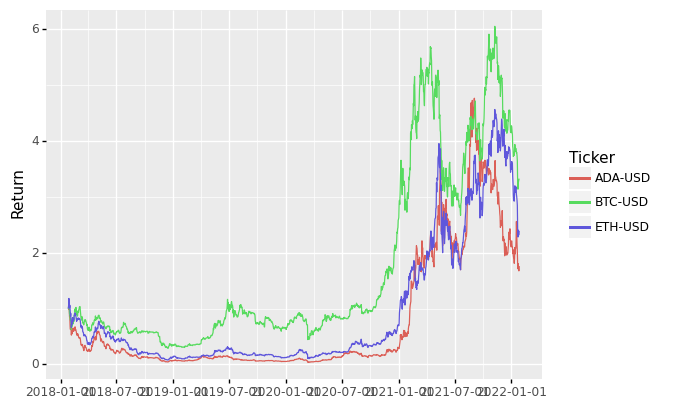

<ggplot: (166135528048)>

In [366]:
# Plot data
crypto_data_norm_ret_plot = pd.melt(crypto_data_norm_ret, var_name='Ticker', value_name='Return', ignore_index = False)
(
    ggplot(crypto_data_norm_ret_plot, aes(x = crypto_data_norm_ret_plot.index, 
                                          y = crypto_data_norm_ret_plot['Return'], 
                                          color = crypto_data_norm_ret_plot['Ticker']))+
    geom_line()
)
# GO MATIC !!!

In [301]:
crypto_data_ret

,BTC-USD,ETH-USD,ADA-USD,BNB-USD,XRP-USD,LUNA-USD,MATIC-USD
Date,,,,,,,
2020-01-27,0.036408,0.016979,0.074718,0.014491,0.002324,0.023362,0.027526
2020-01-28,0.050368,0.031822,0.103210,0.023955,0.031424,0.044209,0.020461
2020-01-29,-0.004484,-0.007484,0.012430,-0.011171,-0.011565,-0.006292,-0.008461
2020-01-30,0.020647,0.055071,0.047763,0.037829,0.033564,0.053016,0.089714
2020-01-31,-0.016665,-0.024529,-0.040610,-0.020410,-0.018096,-0.028333,-0.038455
...,...,...,...,...,...,...,...
2022-01-21,-0.103812,-0.147674,-0.107167,-0.129388,-0.116320,-0.087267,-0.133333
2022-01-22,-0.039143,-0.059716,-0.050316,-0.065203,-0.062441,0.006792,-0.099098
2022-01-23,0.035585,0.053991,0.052174,0.072153,0.054885,-0.105734,0.055941


In [356]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(crypto_data_log_ret.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(6))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(crypto_data_log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(crypto_data_log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['BTC-USD', 'ETH-USD', 'ADA-USD', 'BNB-USD', 'XRP-USD', 'LUNA-USD'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686]


Rebalance to sum to 1.0
[0.18401825 0.20335695 0.01014677 0.06112161 0.24419792 0.2971585 ]


Expected Portfolio Return
-0.07717958123725585


Expected Volatility
1.5693904635336415


Sharpe Ratio
-0.049178061821197896


In [345]:
# Set seed (optional)
np.random.seed(101)

num_ports = 50000

all_weights = np.zeros((num_ports,len(crypto_data_log_ret.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(6))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((crypto_data_log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(crypto_data_log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [346]:
sharpe_arr.max()

0.5618331196612882

In [347]:
sharpe_arr.argmax()

92

In [348]:
all_weights[sharpe_arr.argmax(),:]

array([0.26757668, 0.05908868, 0.0100191 , 0.64083685, 0.01179282,
       0.01068587])

In [349]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

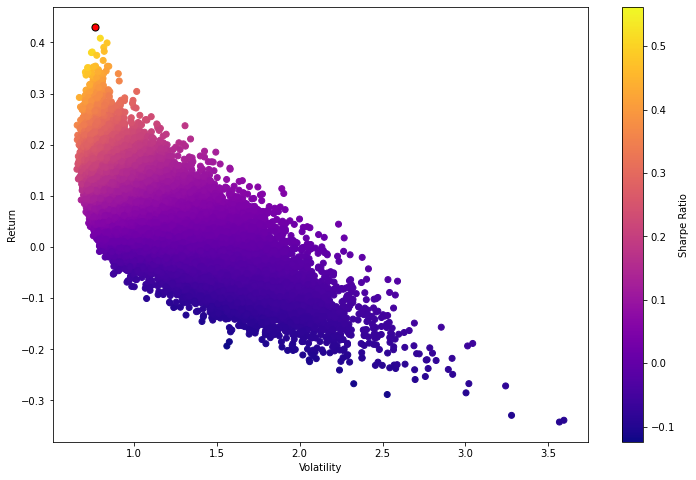

In [350]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [132]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(crypto_data_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(crypto_data_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [133]:
from scipy.optimize import minimize

In [134]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [135]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [136]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [139]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [140]:
# Initial Guess (equal distribution)
init_guess = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

In [141]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [142]:
opt_results

     fun: -3.0011180305928717
     jac: array([ 7.18662977e-01,  7.55475789e-01,  2.98065156e-01, -6.85453415e-07,
        6.66683316e-02,  3.61344844e-01, -2.59280205e-06,  1.20274729e+00,
        4.73659933e-02,  2.83122063e-06])
 message: 'Optimization terminated successfully'
    nfev: 68
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.00000000e+00, 7.92786669e-17, 2.22338509e-16, 4.81896596e-01,
       0.00000000e+00, 2.00384437e-17, 1.94266200e-01, 0.00000000e+00,
       1.37824092e-16, 3.23837205e-01])

In [143]:
opt_results.x


array([0.00000000e+00, 7.92786669e-17, 2.22338509e-16, 4.81896596e-01,
       0.00000000e+00, 2.00384437e-17, 1.94266200e-01, 0.00000000e+00,
       1.37824092e-16, 3.23837205e-01])

In [144]:
get_ret_vol_sr(opt_results.x)

array([3.29434273, 1.09770515, 3.00111803])

In [156]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,2.8,300) # Change 100 to a lower number for slower computers!

In [157]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [158]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

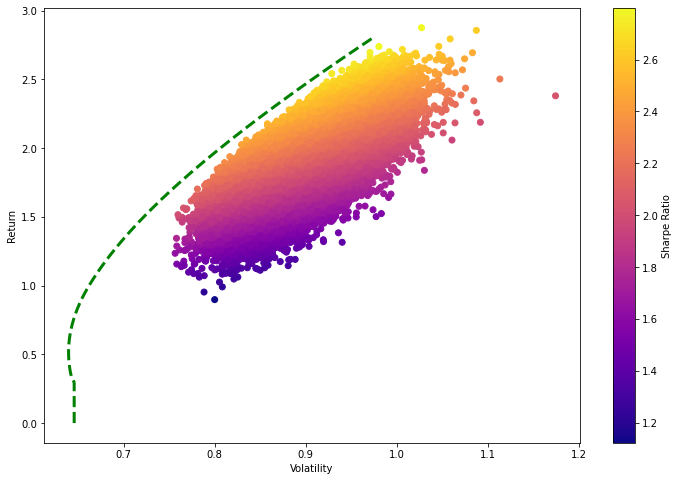

In [159]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)